In [9]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 6]

# %matplotlib notebook

import sys

sys.path.append("../incl/")

# import ELPH_utils
import ELPH_dyn
# import codimar

# from RedDimApprox import RedDimApprox

import narrom

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
trajectories = narrom.utils.load_trajectories(filename='/home/agluedge/Preprints/ELPH/runs/runs_n_kmax=200.npz')

# trajectories = trajectories[:100:1]

for k in range(len(trajectories)):
    trajectories[k] = trajectories[k].T

n_trajectories = len(trajectories)
n_kmax = trajectories[0].shape[1]

print(n_trajectories, 'loaded with n_kmax =', n_kmax)

1000 loaded with n_kmax = 200


In [3]:
dim_reducer = narrom.dim_reducer.SVD()

model = narrom.utils.reducer_helper_class(trajectories, dim_reducer)
model.train()

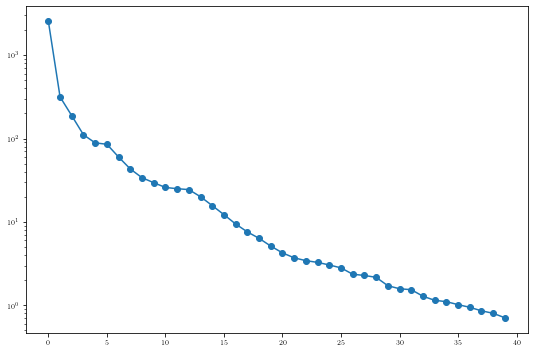

In [16]:
plt.semilogy(dim_reducer.S[:40],marker='o')
plt.show()

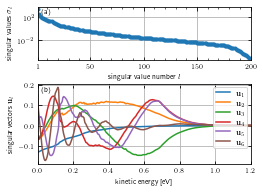

In [7]:
kmax = 4.
n_kmax = 200

E_el = ELPH_dyn.electron_dispersion(np.linspace(0,kmax,n_kmax,endpoint=True),0)



####################################################
####################################################
####################################################

from matplotlib import rc
rc('text', usetex=True)

from matplotlib import gridspec
import matplotlib.ticker as ticker

fs = 7
fig = plt.figure(figsize=(3.5,2.5))
plt.rcParams.update({'font.size': fs})
gs = gridspec.GridSpec(nrows=2, ncols=1, width_ratios=[1], height_ratios=[1,1.5])


####################################################
####################################################
####################################################


ax00 = plt.subplot(gs[0,0])

plt.grid(0.5)
plt.semilogy(np.arange(1,200.5,1),dim_reducer.S,'o',ms=3)

plt.xlim(1,200)
# plt.ylim(0,1)

# plt.title('singular values')
plt.xlabel(r'singular value number $l$')
plt.ylabel(r'singular values $\sigma_l$')

ax00.xaxis.set_ticks_position('both')
ax00.yaxis.set_ticks_position('both')
ax00.tick_params(which='both', direction='in', color='k')

# ax00.xaxis.set_major_locator(ticker.MultipleLocator(50))
ax00.xaxis.set_major_locator(ticker.FixedLocator([1,50,100,150,200]))
ax00.xaxis.set_minor_locator(ticker.MultipleLocator(10))
# ax00.xaxis.set_major_formatter(ticker.NullFormatter())
# ax00.xaxis.set_minor_formatter(ticker.NullFormatter())

# ax00.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
# ax00.yaxis.set_minor_locator(ticker.MultipleLocator(0.04))
#ax00.yaxis.set_major_formatter(ticker.NullFormatter())
#ax00.yaxis.set_minor_formatter(ticker.NullFormatter())

plt.text(0.015, 0.97,r'(a)', horizontalalignment='left', verticalalignment='top', transform=ax00.transAxes)

####################################################
####################################################
####################################################


ax00 = plt.subplot(gs[1,0])

plt.grid(0.5)

rdim = 6
for l in range(rdim):
    plt.plot(E_el,dim_reducer.U[:,l],  label=r'$\mathbf{u}_'+str(l+1)+'$')
# plt.title('first ' + str(rdim) + ' singular')

plt.legend(loc='upper right')

plt.xlim(0,1.2)
# plt.ylim(0,1)


plt.xlabel(r'kinetic energy [eV]')
plt.ylabel(r'singular vectors $\mathbf{u}_l$')

ax00.xaxis.set_ticks_position('both')
ax00.yaxis.set_ticks_position('both')
ax00.tick_params(which='both', direction='in', color='k')

# ax00.xaxis.set_major_locator(ticker.MultipleLocator(50))
# ax00.xaxis.set_minor_locator(ticker.MultipleLocator(10))
# ax00.xaxis.set_major_formatter(ticker.NullFormatter())
# ax00.xaxis.set_minor_formatter(ticker.NullFormatter())

# ax00.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
# ax00.yaxis.set_minor_locator(ticker.MultipleLocator(0.04))
#ax00.yaxis.set_major_formatter(ticker.NullFormatter())
#ax00.yaxis.set_minor_formatter(ticker.NullFormatter())

plt.text(0.015, 0.97,r'(b)', horizontalalignment='left', verticalalignment='top', transform=ax00.transAxes)

####################################################
####################################################
####################################################


plt.tight_layout()

plt.subplots_adjust(left=0.125, bottom=0.115, right=0.97, top=0.99, wspace=0.15, hspace=0.35)

plt.savefig('/home/agluedge/Preprints/ELPH/figs/SVD.pdf')
plt.show()

In [4]:
test_trajectory = narrom.utils.load_trajectories(filename='/home/agluedge/Preprints/ELPH/example_run.npz')[0].T
print('example trajectory loaded with shape: ', test_trajectory.shape)

example trajectory loaded with shape:  (400, 200)


In [5]:
pred = model.approx_single_run(test_trajectory, rdim=20)

print(model.get_error(test_trajectory, pred, rdim=20, norm='max'))


0.09517082553297851


In [6]:
rdim = 20

red = dim_reducer.reduce(test_trajectory, rdim=rdim)


0.8015539573803004


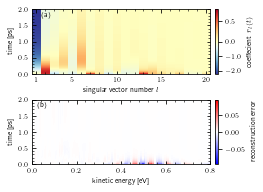

In [17]:
err = pred-test_trajectory


####################################################
####################################################
####################################################

from matplotlib import rc
rc('text', usetex=True)

from matplotlib import gridspec
import matplotlib.ticker as ticker

import matplotlib.colors as colors

fs = 7
fig = plt.figure(figsize=(3.5,2.5))
plt.rcParams.update({'font.size': fs})
gs = gridspec.GridSpec(nrows=2, ncols=2, width_ratios=[1,0.02], height_ratios=[1,1])


####################################################
####################################################
####################################################


ax00 = plt.subplot(gs[0,0])


# extent = [0,2,0.5,red.shape[0]+0.5]
extent = [0.5,red.shape[1]+0.5,0,2]


vmin = red.min()
vmax = red.max()
print(vmax)
        
# midnorm = MidpointNormalize(vmin=vmin, vcenter=0.0, vmax=vmax)

# plt.imshow(red, aspect='auto', interpolation='none')
# im = plt.imshow(red, aspect='auto', interpolation='none', norm=colors.CenteredNorm(vcenter=0.0), cmap='RdYlBu_r', extent=extent, origin='lower')
im = plt.imshow(red, aspect='auto', interpolation='none', norm=colors.TwoSlopeNorm(vcenter=0.0), cmap='RdYlBu_r', extent=extent, origin='lower', rasterized=True)
# cbar = plt.colorbar()
# cbar.set_label(r'coeffecient $r_l(t)$')

# plt.ylim(1,200)
plt.xlim(0.5,red.shape[1]+0.5)

# plt.title('singular values')
plt.ylabel(r'time [ps]')
plt.xlabel(r'singular vector number $l$')

ax00.xaxis.set_ticks_position('both')
ax00.yaxis.set_ticks_position('both')
ax00.tick_params(which='both', direction='in', color='k')

# ax00.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax00.xaxis.set_major_locator(ticker.FixedLocator([1,5,10,15,20]))
ax00.xaxis.set_minor_locator(ticker.MultipleLocator(1))
# ax00.xaxis.set_major_formatter(ticker.NullFormatter())
# ax00.xaxis.set_minor_formatter(ticker.NullFormatter())

ax00.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax00.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
#ax00.yaxis.set_major_formatter(ticker.NullFormatter())
#ax00.yaxis.set_minor_formatter(ticker.NullFormatter())

plt.text(0.05, 0.97,r'(a)', horizontalalignment='left', verticalalignment='top', transform=ax00.transAxes, rasterized=True)


axCB = plt.subplot(gs[0,1])

cb = plt.colorbar(im, cax = axCB)
cb.set_label(r'coeffecient $r_l(t)$')

axCB.yaxis.set_major_locator(ticker.FixedLocator([-2,-1,0,0.5]))

####################################################
####################################################
####################################################

t = np.linspace(0,2,err.shape[0])

ax00 = plt.subplot(gs[1,0])

vmin = err.min()
vmax = err.max()
        
# midnorm = MidpointNormalize(vmin=vmin, vcenter=0.0, vmax=vmax)

# plt.imshow(red, aspect='auto', interpolation='none')
im = plt.pcolormesh(E_el,t,err,norm=colors.CenteredNorm(vcenter=0.0), cmap='bwr', shading='auto', rasterized=True)
# cbar = plt.colorbar()
# cbar.set_label(r'reconstruction error')

# plt.xlim(0,1.2)
plt.xlim(0,0.8)


plt.ylabel(r'time [ps]')
plt.xlabel(r'kinetic energy [eV]')

ax00.xaxis.set_ticks_position('both')
ax00.yaxis.set_ticks_position('both')
ax00.tick_params(which='both', direction='in', color='k')

ax00.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax00.xaxis.set_minor_locator(ticker.MultipleLocator(0.04))
# ax00.xaxis.set_major_formatter(ticker.NullFormatter())
# ax00.xaxis.set_minor_formatter(ticker.NullFormatter())

ax00.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax00.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
#ax00.yaxis.set_major_formatter(ticker.NullFormatter())
#ax00.yaxis.set_minor_formatter(ticker.NullFormatter())

plt.text(0.03, 0.97,r'(b)', horizontalalignment='left', verticalalignment='top', transform=ax00.transAxes)


axCB = plt.subplot(gs[1,1])

cb = plt.colorbar(im, cax = axCB)
cb.set_label(r'reconstruction error')


####################################################
####################################################
####################################################


plt.tight_layout()

plt.subplots_adjust(left=0.1, bottom=0.12, right=0.84, top=0.98, wspace=0.05, hspace=0.4)

plt.savefig('/home/agluedge/Preprints/ELPH/figs/SVD_dyn_reduction.pdf', dpi=600)
plt.show()